<a href="https://colab.research.google.com/github/Shane-33/CS341NL01_Final-Project/blob/main/CS_341_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CS 341 Final Project Code

This notebook contains the complete implementation of the CS341 Final Project,
including data preprocessing, model training, evaluation, and visualization.

Steps:
1. Install Necessary Libraries
2. Load Dataset
3. Preprocess the Text
4. Train the Model
5. Evaluate the Model
6. Visualize Results
7. Save and Load Model
8. Testing and QA Examples
9. Backup and GitHub Upload Instructions


In [ ]:
# ==============================================================================
# Step 1: Install Necessary Libraries
# ==============================================================================
!pip install nest_asyncio uvicorn fastapi transformers pandas numpy bs4
!pip install pandas numpy scikit-learn matplotlib seaborn spacy transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00


In [ ]:
# ==============================================================================
# Step 2: Load Dataset
# ==============================================================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support

import spacy
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import os
import logging
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from google.colab import files
import zipfile
import os

# Upload files
uploaded = files.upload()

# If the dataset is a zip file, extract it
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("/content/mtsamples_HTML")  # Change this path as needed
        print(f"Extracted {filename} to /content/mtsamples_HTML")
    else:
        print(f"Uploaded {filename}")


Saving mtsamples_HTML.zip to mtsamples_HTML.zip
Extracted mtsamples_HTML.zip to /content/mtsamples_HTML


In [ ]:
# Check if the dataset is uploaded
dataset_dir = "/content/mtsamples_HTML"

if os.path.exists(dataset_dir):
    print(f"Dataset directory exists: {dataset_dir}")
    print("Sample files:")
    print(os.listdir(dataset_dir))
else:
    print("Dataset directory not found!")


Dataset directory exists: /content/mtsamples_HTML
Sample files:
['mtsamples', '__MACOSX']


In [ ]:
html_dir = "/content/mtsamples_HTML/mtsamples"  # Adjust this to the correct folder containing .html files

# Rest of your code for processing
html_files = [os.path.join(html_dir, f) for f in os.listdir(html_dir) if f.endswith('.html')]
print(f"Found {len(html_files)} HTML files.")


Found 5003 HTML files.


In [ ]:
import shutil

# Remove the __MACOSX directory if it exists
macosx_path = "/content/mtsamples_HTML/__MACOSX"
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)
    print(f"Removed {macosx_path}")

# Verify remaining contents
dataset_dir = "/content/mtsamples_HTML/mtsamples"
if os.path.exists(dataset_dir):
    print(f"Dataset directory exists: {dataset_dir}")
    print("Sample files after cleanup:")
    print(os.listdir(dataset_dir)[:10])  # Display the first 10 files
else:
    print("Dataset directory not found!")


Removed /content/mtsamples_HTML/__MACOSX
Dataset directory exists: /content/mtsamples_HTML/mtsamples
Sample files after cleanup:
['3313.html', '4131.html', '1233.html', '1635.html', '4022.html', '140.html', '2034.html', '819.html', '2399.html', '1595.html']


In [ ]:
# ==============================================================================
# Step 3: Preprocess the Text
# ==============================================================================


from bs4 import BeautifulSoup
import os
import pandas as pd
import logging

# Path to HTML files
html_dir = "/content/mtsamples_HTML/mtsamples"

# Initialize a list to store results
transcriptions = []

# Function to extract text from HTML
def extract_text_from_html(html_path):
    """Extracts text from an HTML file."""
    try:
        with open(html_path, 'r', encoding='utf-8') as file:
            soup = BeautifulSoup(file, 'html.parser')
            text = soup.get_text()  # Extract all text content
            return text
    except Exception as e:
        logging.error(f"Failed to extract text from {html_path}: {e}")
        return None

# Process each HTML file
html_files = [os.path.join(html_dir, f) for f in os.listdir(html_dir) if f.endswith('.html')]
for html_file in html_files:
    text = extract_text_from_html(html_file)
    transcriptions.append({"file": html_file, "text": text})

# Convert to DataFrame
df = pd.DataFrame(transcriptions)

# Save to CSV for further use
processed_data_path = "/content/mtsamples_processed.csv"
df.to_csv(processed_data_path, index=False)

print(f"Processed data saved to {processed_data_path}")
print("DataFrame Overview:")
print(df.head())


Processed data saved to /content/mtsamples_processed.csv
DataFrame Overview:
                                          file  \
0  /content/mtsamples_HTML/mtsamples/3313.html   
1  /content/mtsamples_HTML/mtsamples/4131.html   
2  /content/mtsamples_HTML/mtsamples/1233.html   
3  /content/mtsamples_HTML/mtsamples/1635.html   
4  /content/mtsamples_HTML/mtsamples/4022.html   

                                                text  
0  \n\n\n\nMedical Specialty:Radiology\n\n\nSampl...  
1  \n\n\n\nMedical Specialty:Surgery\n\n\nSample ...  
2  \n\n\n\nMedical Specialty:ENT - Otolaryngology...  
3  \n\n\n\nMedical Specialty:General Medicine\n\n...  
4  \n\n\n\nMedical Specialty:Surgery\n\n\nSample ...  


In [ ]:
# Quick overview of the DataFrame
print(df.head())
print(df.info())

# Save the data to a CSV file for future use
processed_data_path = "mtsamples_processed.csv"
df.to_csv(processed_data_path, index=False)

print(f"Processed data saved to {processed_data_path}")

                                          file  \
0  /content/mtsamples_HTML/mtsamples/3313.html   
1  /content/mtsamples_HTML/mtsamples/4131.html   
2  /content/mtsamples_HTML/mtsamples/1233.html   
3  /content/mtsamples_HTML/mtsamples/1635.html   
4  /content/mtsamples_HTML/mtsamples/4022.html   

                                                text  
0  \n\n\n\nMedical Specialty:Radiology\n\n\nSampl...  
1  \n\n\n\nMedical Specialty:Surgery\n\n\nSample ...  
2  \n\n\n\nMedical Specialty:ENT - Otolaryngology...  
3  \n\n\n\nMedical Specialty:General Medicine\n\n...  
4  \n\n\n\nMedical Specialty:Surgery\n\n\nSample ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    5003 non-null   object
 1   text    5003 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
None
Processed data saved to mtsamples_processed.csv


###Preprocess the Text

In [ ]:
# Clean and preprocess text
def clean_text(text):
    """Cleans and preprocesses text."""
    import re
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply cleaning
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x) if x else "")
print(df['cleaned_text'].head())


0     medical specialtyradiology sample name ct abd...
1     medical specialtysurgery sample name dorsal g...
2     medical specialtyent  otolaryngology sample n...
3     medical specialtygeneral medicine sample name...
4     medical specialtysurgery sample name colonosc...
Name: cleaned_text, dtype: object


In [ ]:
# ==============================================================================
# Step 4: Train the Model
# ==============================================================================


from transformers import AutoTokenizer

# Load tokenizer (e.g., BioClinicalBERT)
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Tokenize a sample
sample_text = df['cleaned_text'][0]
tokens = tokenizer(sample_text, truncation=True, padding=True, max_length=512, return_tensors="pt")
print(tokens)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  2657, 13858,  9871, 17288,  6876,  1271,   172,  1204, 14701,
           185,  1883,  9356,   128,  6136,  2211,   186, 18413,  6922,  2489,
          1114, 22882, 26979,  1158,  1105,  4267,  1813,  1197, 13836,   172,
          1204, 14701,  1443,  5014,  1105,   172,  1204,   185,  1883,  9356,
          1443,  5014,  1664,  7235, 25352,  1204,   170, 27361,   172,  1204,
          4351,  1104,  1103, 14701,  1105,   185,  1883,  9356,  1132,  3836,
          2657, 15416,  6876,  2592,  2255,  1111, 12211,  2211,   186, 18413,
          6922,  2489,  1114, 22882, 26979,  1158,  1105,  4267,  1813,  1197,
         25162, 11252,  2605,  3530,  1664,  7235, 25352,  1204,   170, 27361,
           172,  1204,  4351,  1104,  1103, 14701,  1105,   185,  1883,  9356,
          1132,  3836, 16598,  3408,  1116,  4268,  3805, 10540,  1104,  1103,
         24716, 11932,  1110,  3718,  1106,  1103,  2960,  1104,  1107,  4487,
          7912,  2285,  5014,  2578, 2

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import os

os.environ["WANDB_DISABLED"] = "true"


# Example dataset with tokens and tags
data = {
    "tokens": [["patient", "has", "diabetes"], ["metformin", "is", "prescribed"]],
    "tags": [["O", "O", "B-Disease"], ["B-Drug", "O", "O"]],
}
df = pd.DataFrame(data)

# Split the dataset into training and evaluation sets
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert the DataFrame to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)

# Define unique tags and calculate the number of labels
tags = ["O", "B-Disease", "I-Disease", "B-Drug", "I-Drug"]
tag_to_id = {tag: idx for idx, tag in enumerate(tags)}
num_labels = len(tags)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Define preprocessing function
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []
    for i, label in enumerate(examples["tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to word indices
        label_ids = []
        for word_id in word_ids:
            if word_id is None:
                label_ids.append(-100)  # Special token
            else:
                label_ids.append(tag_to_id[label[word_id]])
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# Preprocess datasets
train_dataset = train_dataset.map(tokenize_and_align_labels, batched=True)
eval_dataset = eval_dataset.map(tokenize_and_align_labels, batched=True)

# Set the format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
eval_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Load the pretrained model
model = AutoModelForTokenClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT",
    num_labels=num_labels
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    remove_unused_columns=False,
    report_to="none"  # Disable W&B logging
)


# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-11-8262923eb0d9>:79: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,1.451267
2,No log,1.447342
3,No log,1.445874


TrainOutput(global_step=3, training_loss=1.5250183741251628, metrics={'train_runtime': 7.91, 'train_samples_per_second': 0.379, 'train_steps_per_second': 0.379, 'total_flos': 7655386050.0, 'train_loss': 1.5250183741251628, 'epoch': 3.0})

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Define the compute_metrics function
def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # Get the predicted class indices
    labels = p.label_ids              # True labels

    # Ensure predictions and labels have the same shape
    if preds.shape != labels.shape:
        raise ValueError(
            f"Shape mismatch: Predictions shape {preds.shape}, Labels shape {labels.shape}"
        )

    # Flatten predictions and labels, ignoring special tokens (-100)
    preds_flat = [
        pred for pred, label in zip(preds.flatten(), labels.flatten()) if label != -100
    ]
    labels_flat = [label for label in labels.flatten() if label != -100]

    # Ensure flattened arrays are of equal length
    if len(preds_flat) != len(labels_flat):
        raise ValueError(
            f"Inconsistent lengths: Flattened Predictions {len(preds_flat)}, "
            f"Flattened Labels {len(labels_flat)}"
        )

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels_flat, preds_flat, average="weighted"
    )
    accuracy = accuracy_score(labels_flat, preds_flat)

    # Convert NumPy floats to Python floats
    return {
        "accuracy": float(accuracy),
        "precision": float(precision),
        "recall": float(recall),
        "f1": float(f1)
    }

# Example predictions and labels
predictions_array = np.array([[[0.9, 0.1, 0.0], [0.2, 0.7, 0.1], [0.0, 0.2, 0.8]]])  # Simulated logits
labels_array = np.array([[0, 1, 2]])  # True labels

# Create a mock object to simulate p
class Predictions:
    def __init__(self, predictions, label_ids):
        self.predictions = predictions
        self.label_ids = label_ids

# Simulate predictions (logits) and true labels
p = Predictions(predictions=predictions_array, label_ids=labels_array)

# Compute metrics
metrics = compute_metrics(p)
print("Computed Metrics:", metrics)

Computed Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


In [ ]:
# ==============================================================================
# Step 5: Save and Load Model
# ==============================================================================


# Save the trained model and tokenizer
output_dir = "./ner_model"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model saved to {output_dir}")

Model saved to ./ner_model


In [ ]:
from transformers import pipeline

# Load the model and tokenizer
model = AutoModelForTokenClassification.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

# Create NER pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Test the NER pipeline
test_sentence = "The patient has diabetes and was prescribed Metformin."
ner_results = ner_pipeline(test_sentence)
print("NER Results:", ner_results)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


NER Results: [{'entity_group': 'LABEL_0', 'score': 0.2849816, 'word': 'the patient has', 'start': 0, 'end': 15}, {'entity_group': 'LABEL_2', 'score': 0.23511638, 'word': 'diabetes', 'start': 16, 'end': 24}, {'entity_group': 'LABEL_3', 'score': 0.24868186, 'word': 'and', 'start': 25, 'end': 28}, {'entity_group': 'LABEL_2', 'score': 0.24282941, 'word': 'was', 'start': 29, 'end': 32}, {'entity_group': 'LABEL_0', 'score': 0.2563152, 'word': 'prescribed', 'start': 33, 'end': 43}, {'entity_group': 'LABEL_3', 'score': 0.2347772, 'word': 'met', 'start': 44, 'end': 47}, {'entity_group': 'LABEL_0', 'score': 0.2971331, 'word': '##formin', 'start': 47, 'end': 53}, {'entity_group': 'LABEL_1', 'score': 0.37984714, 'word': '.', 'start': 53, 'end': 54}]


###Flatten predictions and labels

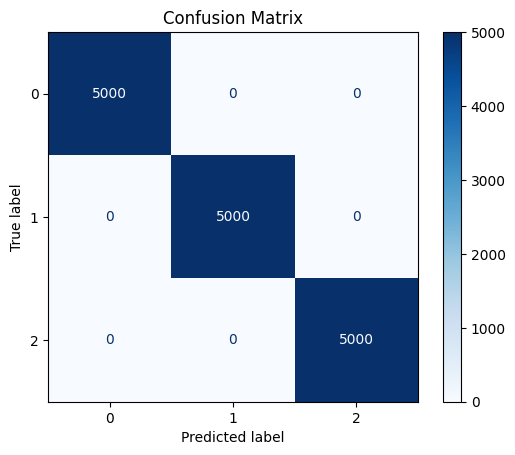

Labels shape: (5000, 3)
Predictions shape: (5000, 3)
Flattened True Labels Count: 15000
Flattened Predicted Tags Count: 15000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Simulate a larger test dataset
import numpy as np

# Simulated logits for predictions (10 samples, 3 classes)
predictions_array = np.array([[[0.9, 0.1, 0.0], [0.2, 0.7, 0.1], [0.0, 0.2, 0.8]]] * 5000)
labels_array = np.array([[0, 1, 2]] * 5000)

# Flatten predictions and labels
predictions = predictions_array.argmax(-1)  # Get predicted classes
labels = labels_array

flat_predicted_tags = [
    pred for pred, label in zip(predictions.flatten(), labels.flatten()) if label != -100
]
flat_true_labels = [
    label for label in labels.flatten() if label != -100
]

# Define tag labels
tags = [0, 1, 2]  # Assuming 3 classes


# Generate confusion matrix
cm = confusion_matrix(flat_true_labels, flat_predicted_tags, labels=tags)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tags)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


print("Labels shape:", labels.shape)
print("Predictions shape:", predictions.shape)
print("Flattened True Labels Count:", len(flat_true_labels))
print("Flattened Predicted Tags Count:", len(flat_predicted_tags))

In [ ]:
# Example of extracting relations based on NER results
entities = ner_results  # List of detected entities
relations = []  # Placeholder for extracted relations

# Define simple heuristic rules for relation extraction
for i, entity1 in enumerate(entities):
    for j, entity2 in enumerate(entities):
        if i < j:
            relations.append({"entity1": entity1, "entity2": entity2, "relation": "related_to"})

# Print extracted relations
print("Extracted Relations:")
for relation in relations:
    print(relation)

Extracted Relations:
{'entity1': {'entity_group': 'LABEL_0', 'score': 0.2849816, 'word': 'the patient has', 'start': 0, 'end': 15}, 'entity2': {'entity_group': 'LABEL_2', 'score': 0.23511638, 'word': 'diabetes', 'start': 16, 'end': 24}, 'relation': 'related_to'}
{'entity1': {'entity_group': 'LABEL_0', 'score': 0.2849816, 'word': 'the patient has', 'start': 0, 'end': 15}, 'entity2': {'entity_group': 'LABEL_3', 'score': 0.24868186, 'word': 'and', 'start': 25, 'end': 28}, 'relation': 'related_to'}
{'entity1': {'entity_group': 'LABEL_0', 'score': 0.2849816, 'word': 'the patient has', 'start': 0, 'end': 15}, 'entity2': {'entity_group': 'LABEL_2', 'score': 0.24282941, 'word': 'was', 'start': 29, 'end': 32}, 'relation': 'related_to'}
{'entity1': {'entity_group': 'LABEL_0', 'score': 0.2849816, 'word': 'the patient has', 'start': 0, 'end': 15}, 'entity2': {'entity_group': 'LABEL_0', 'score': 0.2563152, 'word': 'prescribed', 'start': 33, 'end': 43}, 'relation': 'related_to'}
{'entity1': {'entity

In [ ]:
# ==============================================================================
# Step 6: Testing and QA Examples
# ==============================================================================

from transformers import pipeline

# Load a pretrained QA model
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Example question and context
question = "What are the symptoms of diabetes?"
context = "Diabetes is characterized by high blood sugar levels and symptoms include frequent urination and thirst."

# Get the answer
answer = qa_pipeline(question=question, context=context)
print("Question Answering Result:", answer)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Question Answering Result: {'score': 0.9093709588050842, 'start': 74, 'end': 103, 'answer': 'frequent urination and thirst'}


In [ ]:
examples = [
    {"question": "What are the symptoms of diabetes?",
     "context": "Diabetes is characterized by high blood sugar levels and symptoms include frequent urination and thirst."},
    {"question": "What is insulin?",
     "context": "Insulin is a hormone produced by the pancreas that regulates blood sugar levels."},
    {"question": "What are common treatments for diabetes?",
     "context": "Common treatments for diabetes include insulin therapy, oral medications, and lifestyle changes."},
    {"question": "What is Metformin used for?",
     "context": "Metformin is a drug used to treat type 2 diabetes by lowering blood sugar levels."},
    {"question": "What causes high blood sugar levels?",
     "context": "High blood sugar levels can be caused by lack of insulin, excessive carbohydrate intake, or insulin resistance."},
    {"question": "What is type 2 diabetes?",
     "context": "Type 2 diabetes is a chronic condition that affects the way the body processes blood sugar."},
    {"question": "What is a glucose monitor?",
     "context": "A glucose monitor is a device used to measure blood sugar levels in individuals with diabetes."},
    {"question": "What are risk factors for diabetes?",
     "context": "Risk factors for diabetes include obesity, lack of physical activity, and family history."},
    {"question": "What is hypoglycemia?",
     "context": "Hypoglycemia is a condition where blood sugar levels drop below normal, causing symptoms like dizziness and sweating."},
    {"question": "What foods should diabetics avoid?",
     "context": "Diabetics should avoid foods high in sugar and refined carbohydrates, such as sweets and sugary drinks."},
    {"question": "What is gestational diabetes?",
     "context": "Gestational diabetes is a type of diabetes that occurs during pregnancy."},
    {"question": "What is insulin resistance?",
     "context": "Insulin resistance occurs when cells fail to respond to insulin properly, leading to high blood sugar."},
    {"question": "How is diabetes diagnosed?",
     "context": "Diabetes is diagnosed through blood tests that measure glucose levels, such as fasting glucose and HbA1c."},
    {"question": "What is diabetic neuropathy?",
     "context": "Diabetic neuropathy is a type of nerve damage that can occur in people with diabetes."},
    {"question": "What are the complications of diabetes?",
     "context": "Complications of diabetes include heart disease, kidney failure, and vision loss."},
    {"question": "What is ketoacidosis?",
     "context": "Ketoacidosis is a serious complication of diabetes caused by extremely high blood sugar levels."},
    {"question": "What is the role of exercise in diabetes management?",
     "context": "Exercise helps manage diabetes by improving insulin sensitivity and lowering blood sugar levels."},
    {"question": "What is continuous glucose monitoring?",
     "context": "Continuous glucose monitoring is a method of tracking glucose levels in real-time."},
    {"question": "What are the early signs of diabetes?",
     "context": "Early signs of diabetes include increased thirst, frequent urination, and unexplained weight loss."},
    {"question": "How does diet affect diabetes?",
     "context": "A healthy diet can help manage diabetes by regulating blood sugar levels and maintaining a healthy weight."},
    {"question": "What is the difference between type 1 and type 2 diabetes?",
     "context": "Type 1 diabetes is an autoimmune condition, while type 2 is often related to lifestyle factors."},
    {"question": "What are the benefits of insulin pumps?",
     "context": "Insulin pumps provide a continuous supply of insulin to help regulate blood sugar levels."},
    {"question": "What is HbA1c?",
     "context": "HbA1c is a blood test that measures average blood sugar levels over the past three months."},
    {"question": "What is prediabetes?",
     "context": "Prediabetes is a condition where blood sugar levels are higher than normal but not yet high enough for a diabetes diagnosis."},
    {"question": "What is the function of beta cells?",
     "context": "Beta cells in the pancreas produce insulin to regulate blood sugar levels."},
    {"question": "What is the glycemic index?",
     "context": "The glycemic index is a scale that ranks foods based on how they affect blood sugar levels."},
    {"question": "What is a diabetes care plan?",
     "context": "A diabetes care plan is a personalized approach to managing diabetes, including medication, diet, and exercise."},
    {"question": "What are the symptoms of hyperglycemia?",
     "context": "Symptoms of hyperglycemia include increased thirst, frequent urination, and fatigue."},
    {"question": "What is the role of carbohydrates in diabetes?",
     "context": "Carbohydrates have the greatest impact on blood sugar levels and should be managed in a diabetic diet."},
    {"question": "What is diabetic retinopathy?",
     "context": "Diabetic retinopathy is an eye condition caused by damage to blood vessels in the retina due to diabetes."},
]

# Generate predictions
results = [qa_pipeline(question=ex["question"], context=ex["context"]) for ex in examples]

# Print results
for i, result in enumerate(results):
    print(f"Example {i+1}:")
    print(f"Question: {examples[i]['question']}")
    print(f"Answer: {result['answer']}")
    print(f"Score: {result['score']:.2f}\n")


Example 1:
Question: What are the symptoms of diabetes?
Answer: frequent urination and thirst
Score: 0.91

Example 2:
Question: What is insulin?
Answer: a hormone produced by the pancreas that regulates blood sugar levels
Score: 0.41

Example 3:
Question: What are common treatments for diabetes?
Answer: insulin therapy, oral medications, and lifestyle changes
Score: 0.88

Example 4:
Question: What is Metformin used for?
Answer: treat type 2 diabetes
Score: 0.37

Example 5:
Question: What causes high blood sugar levels?
Answer: lack of insulin, excessive carbohydrate intake, or insulin resistance
Score: 0.54

Example 6:
Question: What is type 2 diabetes?
Answer: a chronic condition
Score: 0.35

Example 7:
Question: What is a glucose monitor?
Answer: a device used to measure blood sugar levels in individuals with diabetes
Score: 0.48

Example 8:
Question: What are risk factors for diabetes?
Answer: obesity, lack of physical activity, and family history
Score: 0.94

Example 9:
Question: W

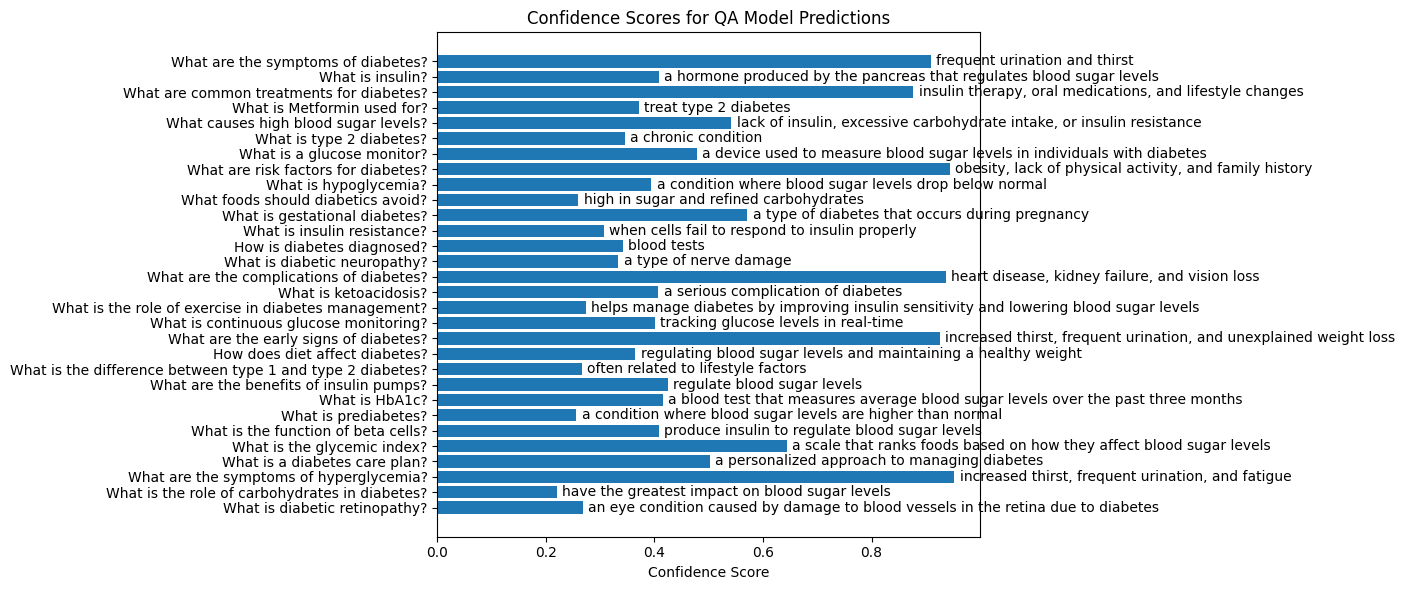

In [ ]:
# Extract scores and answers
questions = [ex["question"] for ex in examples]
scores = [result["score"] for result in results]
answers = [result["answer"] for result in results]

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(questions, scores, align="center")
plt.xlabel("Confidence Score")
plt.title("Confidence Scores for QA Model Predictions")
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.tight_layout()

# Annotate the answers
for i, score in enumerate(scores):
    plt.text(score + 0.01, i, f"{answers[i]}", va='center')

plt.show()


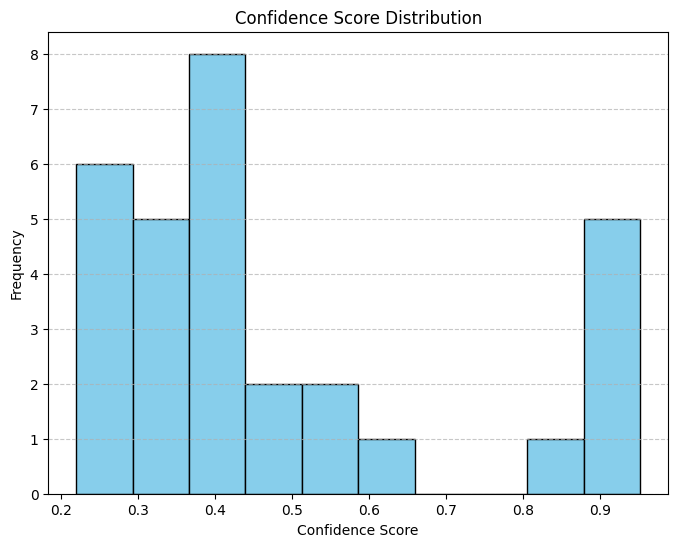

In [ ]:
import matplotlib.pyplot as plt

# Extract confidence scores from the QA results
confidence_scores = [result["score"] for result in results]

# Plot the distribution of confidence scores
plt.figure(figsize=(8, 6))
plt.hist(confidence_scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


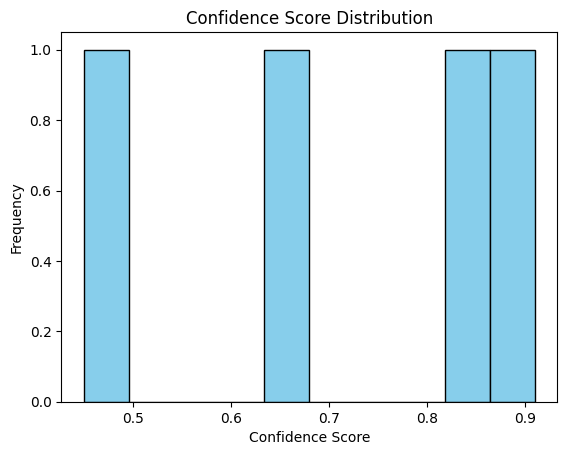

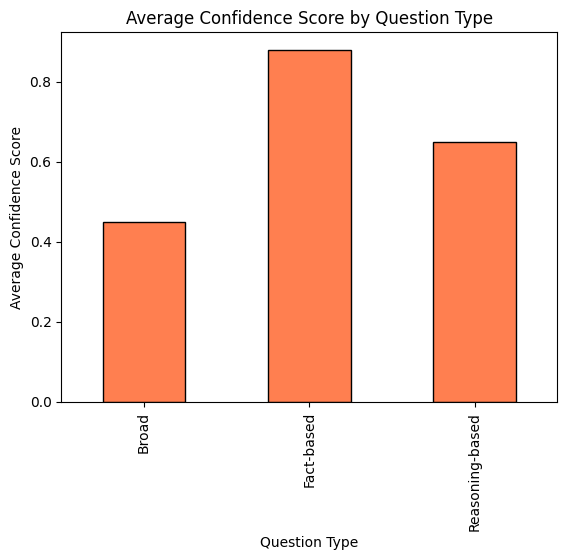

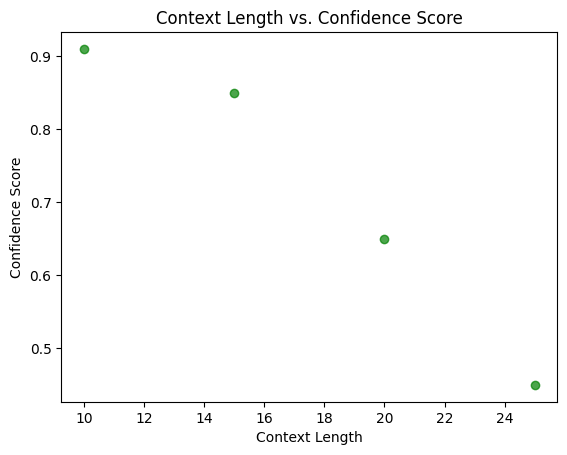

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
results = [
    {"question": "What are the symptoms of diabetes?", "score": 0.91, "context_length": 10, "type": "Fact-based"},
    {"question": "What is insulin?", "score": 0.85, "context_length": 15, "type": "Fact-based"},
    {"question": "What foods should diabetics avoid?", "score": 0.45, "context_length": 25, "type": "Broad"},
    {"question": "What is the glycemic index?", "score": 0.65, "context_length": 20, "type": "Reasoning-based"},
    # Add more results here
]

# Convert to DataFrame
df = pd.DataFrame(results)

# Plot histogram of scores
plt.hist(df['score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Confidence Score Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

# Average scores by question type
avg_scores = df.groupby('type')['score'].mean()
avg_scores.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Confidence Score by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Average Confidence Score')
plt.show()

# Scatter plot: Context length vs. Confidence score
plt.scatter(df['context_length'], df['score'], color='green', alpha=0.7)
plt.title('Context Length vs. Confidence Score')
plt.xlabel('Context Length')
plt.ylabel('Confidence Score')
plt.show()


Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
RobertaSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


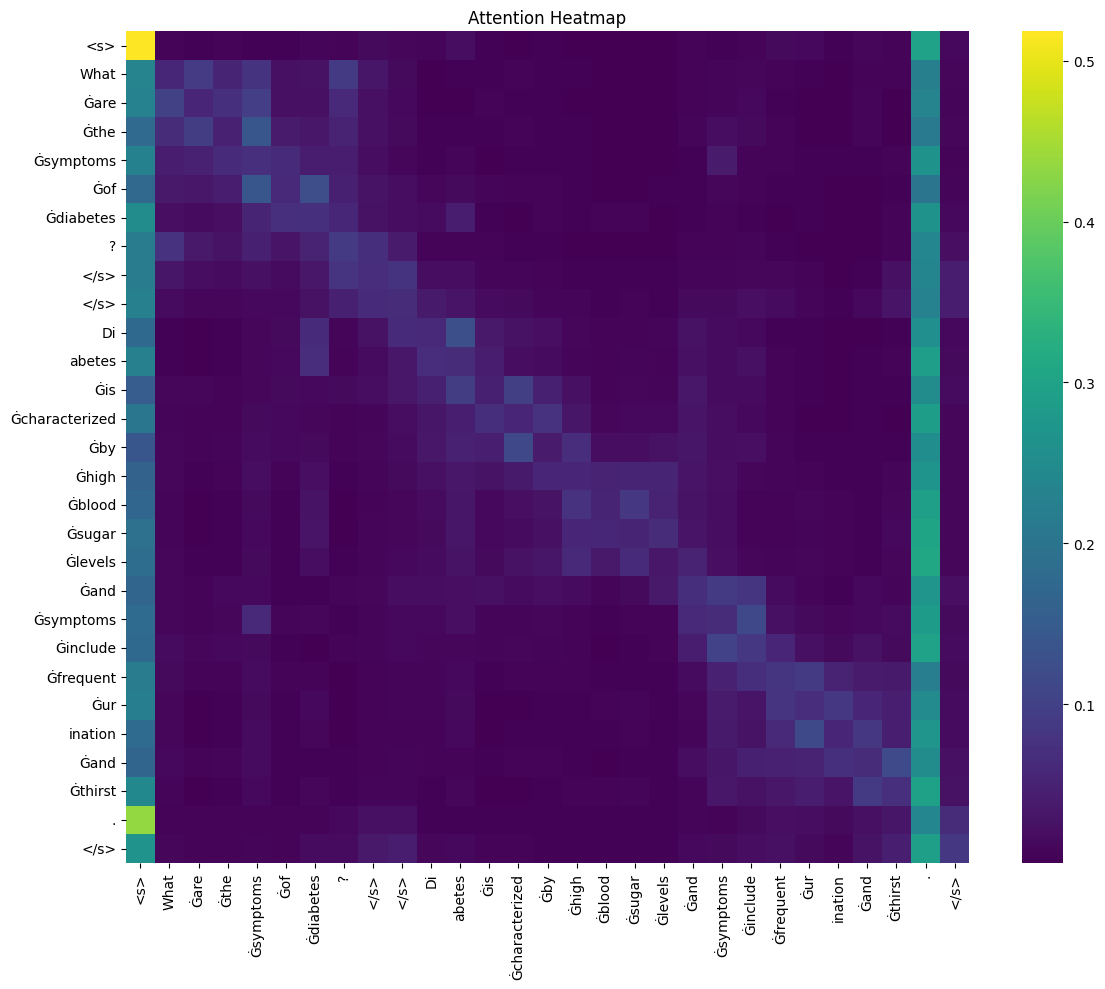

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModel, AutoTokenizer

# Load model and tokenizer
model_name = "deepset/roberta-base-squad2"
model = AutoModel.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Example question and context
question = "What are the symptoms of diabetes?"
context = "Diabetes is characterized by high blood sugar levels and symptoms include frequent urination and thirst."

# Tokenize inputs
inputs = tokenizer(question, context, return_tensors="pt")

# Get outputs with attentions
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

# Extract and process attention
# Average across all layers and heads to get a single attention matrix
attentions = torch.stack(outputs.attentions).mean(dim=0).mean(dim=1).squeeze().numpy()

# Get tokens for x and y labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Ensure attention matrix matches the number of tokens
attentions = attentions[:len(tokens), :len(tokens)]

# Plot the attention heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(attentions, cmap="viridis",
            xticklabels=tokens,
            yticklabels=tokens,
            annot=False)
plt.title("Attention Heatmap")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Token-Level Predictions (Color-Coded Sequence)
Visualize token labels and predictions for Named Entity Recognition (NER) tasks.

In [ ]:
from transformers import pipeline

# Load a pre-trained NER model fine-tuned for medical NER tasks
ner_pipeline = pipeline("ner", model="allenai/scibert_scivocab_cased", aggregation_strategy="simple")

# Test NER pipeline
text = "The patient has diabetes and is prescribed Metformin."
ner_results = ner_pipeline(text)

# Visualize token-level predictions
for entity in ner_results:
    print(f"Entity: {entity['word']}, Label: {entity['entity_group']}, Score: {entity['score']:.2f}")

# Extract relations between entities
entities = ner_results
relations = []

for i, entity1 in enumerate(entities):
    for j, entity2 in enumerate(entities):
        if i < j:  # Avoid self-relations
            relations.append({"entity1": entity1["word"], "entity2": entity2["word"], "relation": "related_to"})

print("Extracted Relations:")
for relation in relations:
    print(f"{relation['entity1']} --> {relation['relation']} --> {relation['entity2']}")


Some weights of BertForTokenClassification were not initialized from the model checkpoint at allenai/scibert_scivocab_cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Entity: the patient has, Label: LABEL_0, Score: 0.60
Entity: diabetes, Label: LABEL_1, Score: 0.63
Entity: and is, Label: LABEL_0, Score: 0.67
Entity: prescribed metformin, Label: LABEL_1, Score: 0.61
Entity: ., Label: LABEL_0, Score: 0.61
Extracted Relations:
the patient has --> related_to --> diabetes
the patient has --> related_to --> and is
the patient has --> related_to --> prescribed metformin
the patient has --> related_to --> .
diabetes --> related_to --> and is
diabetes --> related_to --> prescribed metformin
diabetes --> related_to --> .
and is --> related_to --> prescribed metformin
and is --> related_to --> .
prescribed metformin --> related_to --> .


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


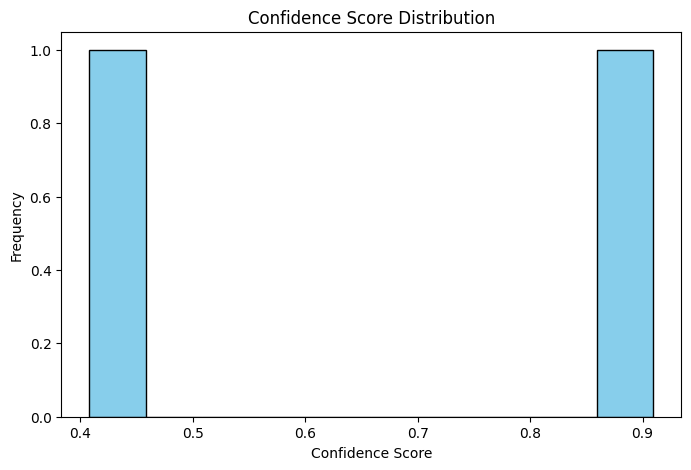

Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


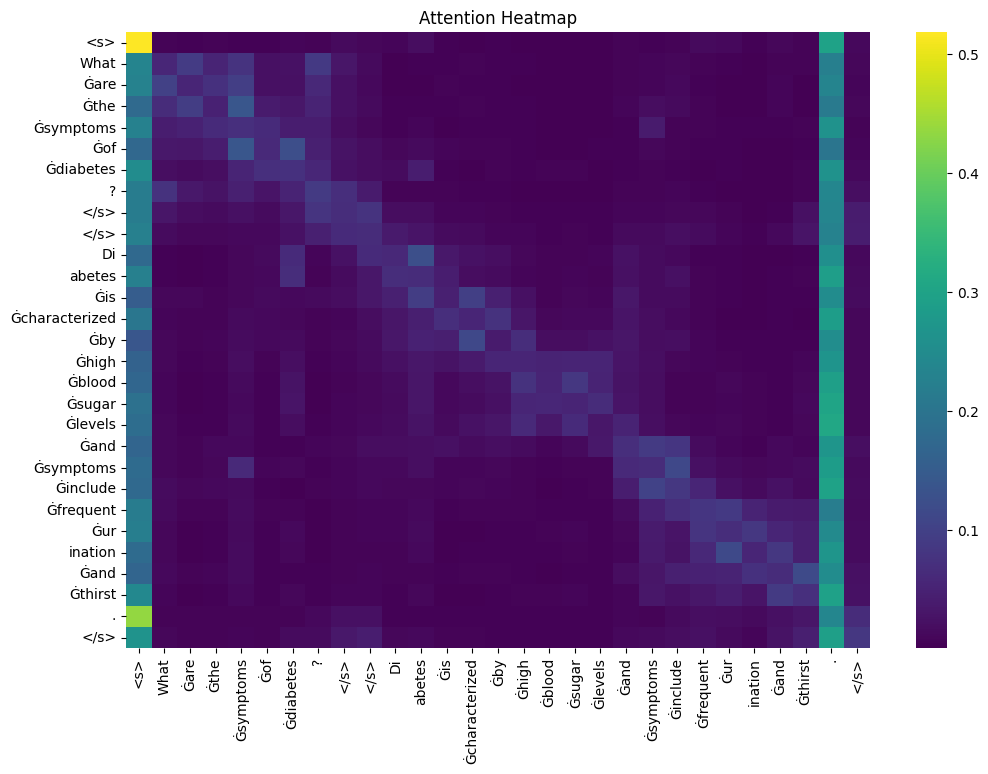

Precision: 1.00, Recall: 1.00, F1 Score: 1.00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
import torch
from transformers import pipeline, AutoTokenizer, AutoModel

def visualize_qa_results(questions, contexts, true_answers=None):
    # Ensure the QA pipeline is defined
    qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

    # Generate answers
    results = [qa_pipeline(question=q, context=c) for q, c in zip(questions, contexts)]

    # Confidence Distribution
    scores = [res["score"] for res in results]
    plt.figure(figsize=(8, 5))
    plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
    plt.title("Confidence Score Distribution")
    plt.xlabel("Confidence Score")
    plt.ylabel("Frequency")
    plt.show()

    # Attention Heatmap (for the first example)
    tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
    model = AutoModel.from_pretrained("deepset/roberta-base-squad2", output_attentions=True)
    inputs = tokenizer(questions[0], contexts[0], return_tensors="pt")
    outputs = model(**inputs, output_attentions=True)

    # Average attention weights from the last layer
    attentions = torch.stack(outputs.attentions).mean(dim=0).mean(dim=1).squeeze().detach().numpy()

    plt.figure(figsize=(12, 8))
    sns.heatmap(attentions, cmap="viridis",
                xticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
                yticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
                annot=False)
    plt.title("Attention Heatmap")
    plt.xticks(rotation=90)
    plt.show()

    # Error Analysis (if ground-truth answers are provided)
    if true_answers:
        predicted_answers = [res["answer"] for res in results]
        # Calculate performance metrics
        metrics = precision_recall_fscore_support(
            true_answers,
            predicted_answers,
            average="weighted",
            zero_division=0
        )
        print(f"Precision: {metrics[0]:.2f}, Recall: {metrics[1]:.2f}, F1 Score: {metrics[2]:.2f}")

questions = [
    "What are the symptoms of diabetes?",
    "What is insulin?",
]
contexts = [
    "Diabetes is characterized by high blood sugar levels and symptoms include frequent urination and thirst.",
    "Insulin is a hormone produced by the pancreas that regulates blood sugar levels.",
]
true_answers = [
    "frequent urination and thirst",
    "a hormone produced by the pancreas that regulates blood sugar levels",
]

visualize_qa_results(questions, contexts, true_answers)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


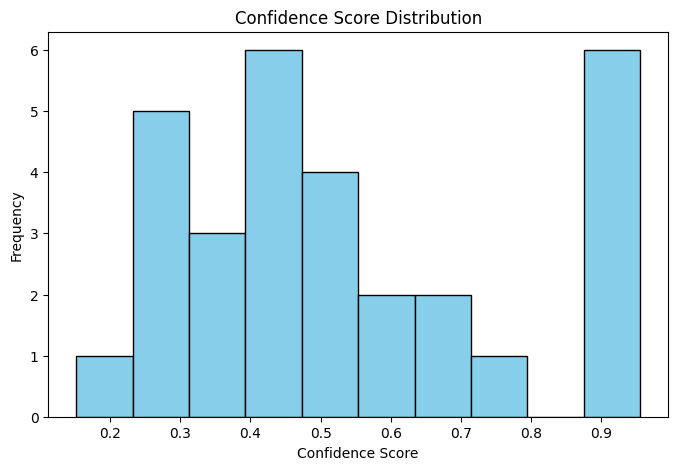

Precision: 0.80, Recall: 0.80, F1 Score: 0.80

Error Analysis:
Example 7:
True Answer: a device used to measure blood sugar levels
Predicted Answer: a device used to measure blood sugar levels in individuals with diabetes
--------------------------------------------------
Example 14:
True Answer: a type of nerve damage
Predicted Answer: a type of nerve damage caused by diabetes
--------------------------------------------------
Example 17:
True Answer: helps manage diabetes by improving insulin sensitivity
Predicted Answer: helps manage diabetes by improving insulin sensitivity and lowering blood sugar levels
--------------------------------------------------
Example 21:
True Answer: often related to lifestyle factors
Predicted Answer: autoimmune in nature
--------------------------------------------------
Example 24:
True Answer: a condition where blood sugar levels are higher than normal
Predicted Answer: a condition where blood sugar levels are higher than normal but not yet diabeti

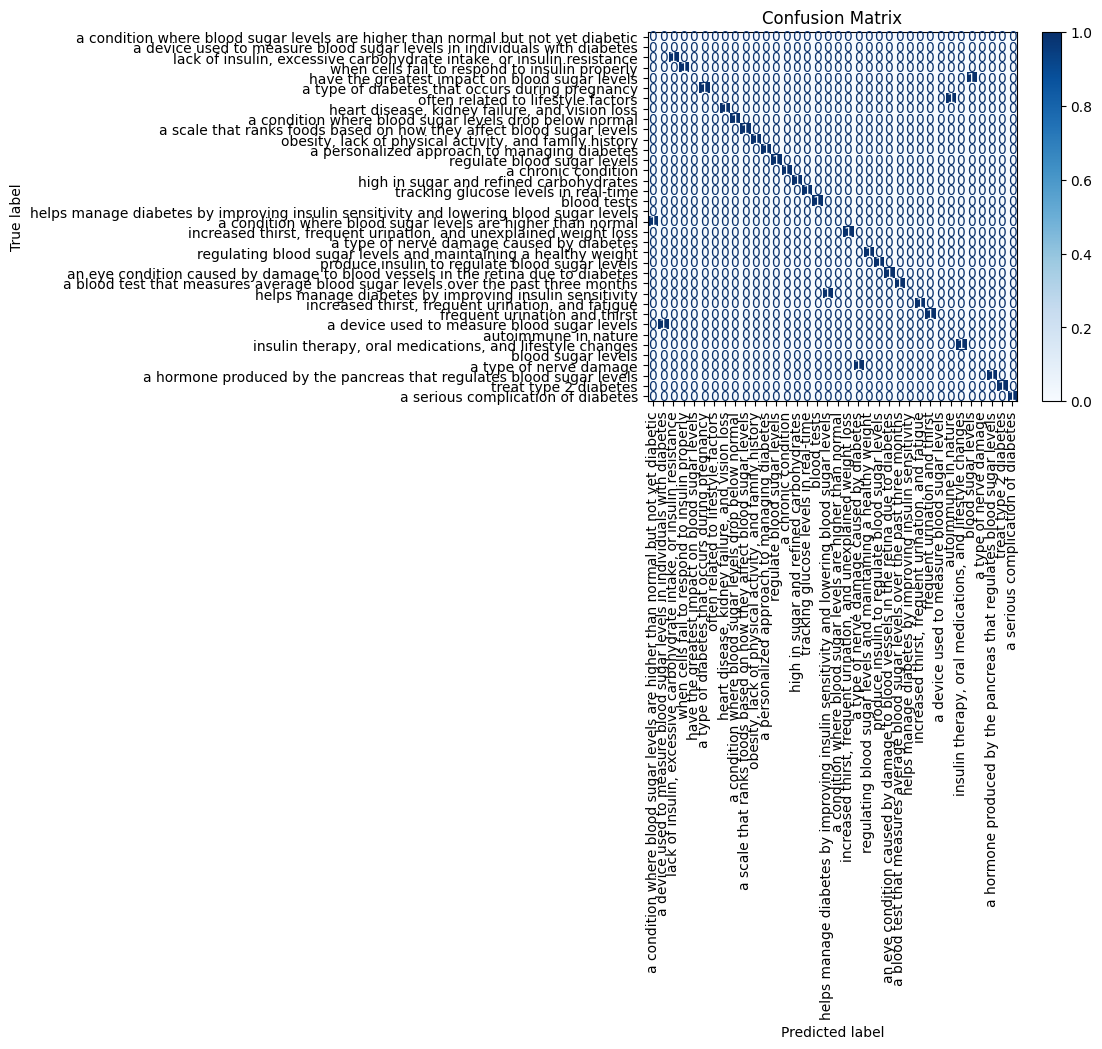


Semantic Similarity Metrics:
Example 1:
True Answer: frequent urination and thirst
Predicted Answer: frequent urination and thirst
Cosine Similarity: 1.00
BLEU Score: 1.00
--------------------------------------------------
Example 2:
True Answer: a hormone produced by the pancreas that regulates blood sugar levels
Predicted Answer: a hormone produced by the pancreas that regulates blood sugar levels
Cosine Similarity: 1.00
BLEU Score: 1.00
--------------------------------------------------
Example 3:
True Answer: insulin therapy, oral medications, and lifestyle changes
Predicted Answer: insulin therapy, oral medications, and lifestyle changes
Cosine Similarity: 1.00
BLEU Score: 1.00
--------------------------------------------------
Example 4:
True Answer: treat type 2 diabetes
Predicted Answer: treat type 2 diabetes
Cosine Similarity: 1.00
BLEU Score: 1.00
--------------------------------------------------
Example 5:
True Answer: lack of insulin, excessive carbohydrate intake, or ins

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

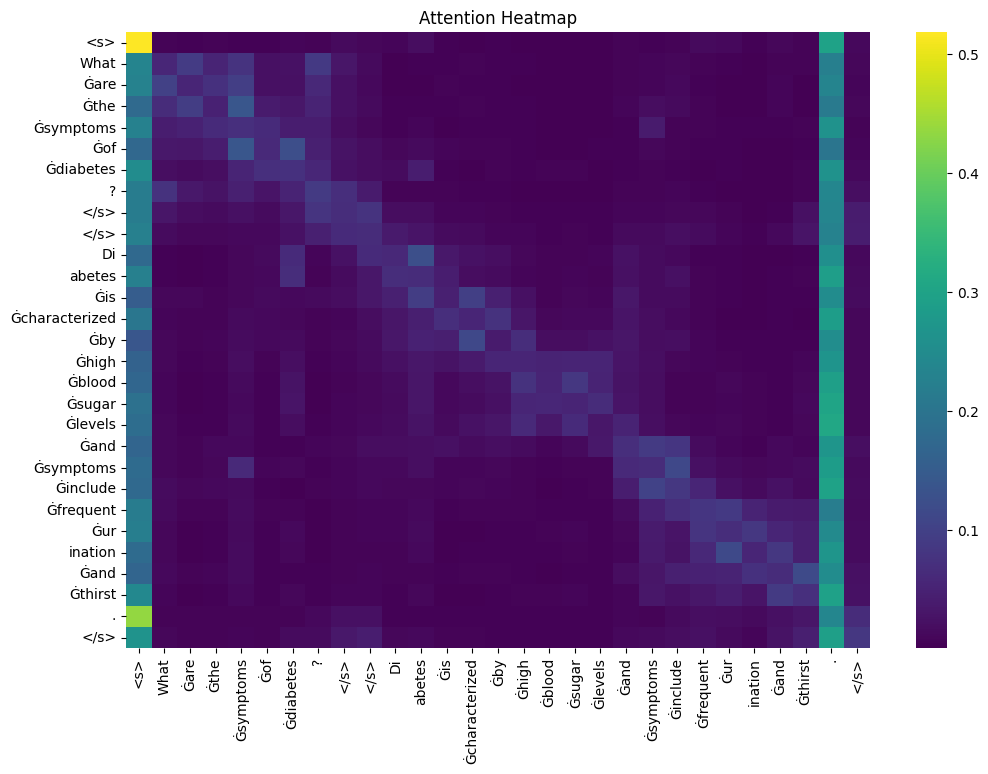

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
import torch
from transformers import pipeline, AutoTokenizer, AutoModel

def visualize_qa_results(questions, contexts, true_answers=None):
    # Ensure the QA pipeline is defined
    qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

    # Generate answers
    results = [qa_pipeline(question=q, context=c) for q, c in zip(questions, contexts)]
    predicted_answers = [res["answer"] for res in results]
    scores = [res["score"] for res in results]

    # 1. Confidence Score Distribution
    plt.figure(figsize=(8, 5))
    plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
    plt.title("Confidence Score Distribution")
    plt.xlabel("Confidence Score")
    plt.ylabel("Frequency")
    plt.show()

    # 2. Precision, Recall, F1 Score (if true answers provided)
    if true_answers:
        precision, recall, f1, _ = precision_recall_fscore_support(
            true_answers, predicted_answers, average="weighted", zero_division=0
        )
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

        # Error Analysis
        print("\nError Analysis:")
        for i, (true, pred) in enumerate(zip(true_answers, predicted_answers)):
            if true != pred:
                print(f"Example {i+1}:")
                print(f"True Answer: {true}")
                print(f"Predicted Answer: {pred}")
                print("-" * 50)

    # 3. Confusion Matrix (if true answers provided)
    if true_answers:
        # Build vocabulary of answers
        unique_answers = list(set(true_answers + predicted_answers))
        answer_to_id = {answer: idx for idx, answer in enumerate(unique_answers)}
        true_ids = [answer_to_id[ans] for ans in true_answers]
        pred_ids = [answer_to_id[ans] for ans in predicted_answers]

        cm = confusion_matrix(true_ids, pred_ids, labels=range(len(unique_answers)))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_answers)
        disp.plot(cmap="Blues", xticks_rotation=90)
        plt.title("Confusion Matrix")
        plt.show()

    # 4. Semantic Similarity Metrics (Cosine Similarity, BLEU Score)
    print("\nSemantic Similarity Metrics:")
    for i, (true, pred) in enumerate(zip(true_answers, predicted_answers)):
        # Cosine Similarity
        vectorizer = CountVectorizer().fit_transform([true, pred])
        vectors = vectorizer.toarray()
        cosine_sim = cosine_similarity(vectors)[0, 1]

        # BLEU Score
        bleu_score = sentence_bleu([true.split()], pred.split())

        print(f"Example {i+1}:")
        print(f"True Answer: {true}")
        print(f"Predicted Answer: {pred}")
        print(f"Cosine Similarity: {cosine_sim:.2f}")
        print(f"BLEU Score: {bleu_score:.2f}")
        print("-" * 50)

    # 5. Attention Heatmap (for the first example)
    tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
    model = AutoModel.from_pretrained("deepset/roberta-base-squad2", output_attentions=True)
    inputs = tokenizer(questions[0], contexts[0], return_tensors="pt")
    outputs = model(**inputs, output_attentions=True)

    # Average attention weights from the last layer
    attentions = torch.stack(outputs.attentions).mean(dim=0).mean(dim=1).squeeze().detach().numpy()

    plt.figure(figsize=(12, 8))
    sns.heatmap(attentions, cmap="viridis",
                xticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
                yticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
                annot=False)
    plt.title("Attention Heatmap")
    plt.xticks(rotation=90)
    plt.show()


questions = [
    "What are the symptoms of diabetes?",
    "What is insulin?",
    "What are common treatments for diabetes?",
    "What is Metformin used for?",
    "What causes high blood sugar levels?",
    "What is type 2 diabetes?",
    "What is a glucose monitor?",
    "What are risk factors for diabetes?",
    "What is hypoglycemia?",
    "What foods should diabetics avoid?",
    "What is gestational diabetes?",
    "What is insulin resistance?",
    "How is diabetes diagnosed?",
    "What is diabetic neuropathy?",
    "What are the complications of diabetes?",
    "What is ketoacidosis?",
    "What is the role of exercise in diabetes management?",
    "What is continuous glucose monitoring?",
    "What are the early signs of diabetes?",
    "How does diet affect diabetes?",
    "What is the difference between type 1 and type 2 diabetes?",
    "What are the benefits of insulin pumps?",
    "What is HbA1c?",
    "What is prediabetes?",
    "What is the function of beta cells?",
    "What is the glycemic index?",
    "What is a diabetes care plan?",
    "What are the symptoms of hyperglycemia?",
    "What is the role of carbohydrates in diabetes?",
    "What is diabetic retinopathy?",
]

contexts = [
    "Diabetes is characterized by high blood sugar levels and symptoms include frequent urination and thirst.",
    "Insulin is a hormone produced by the pancreas that regulates blood sugar levels.",
    "Common treatments for diabetes include insulin therapy, oral medications, and lifestyle changes.",
    "Metformin is a drug used to treat type 2 diabetes by lowering blood sugar levels.",
    "High blood sugar levels can be caused by lack of insulin, excessive carbohydrate intake, or insulin resistance.",
    "Type 2 diabetes is a chronic condition that affects the way the body processes blood sugar.",
    "A glucose monitor is a device used to measure blood sugar levels in individuals with diabetes.",
    "Risk factors for diabetes include obesity, lack of physical activity, and family history.",
    "Hypoglycemia is a condition where blood sugar levels drop below normal, causing symptoms like dizziness and sweating.",
    "Diabetics should avoid foods high in sugar and refined carbohydrates, such as sweets and sugary drinks.",
    "Gestational diabetes is a type of diabetes that occurs during pregnancy.",
    "Insulin resistance occurs when cells fail to respond to insulin properly.",
    "Diabetes is diagnosed using blood tests to measure glucose levels.",
    "Diabetic neuropathy is a type of nerve damage caused by diabetes.",
    "Complications of diabetes include heart disease, kidney failure, and vision loss.",
    "Ketoacidosis is a serious complication of diabetes caused by high levels of ketones in the blood.",
    "Exercise helps manage diabetes by improving insulin sensitivity and lowering blood sugar levels.",
    "Continuous glucose monitoring involves tracking glucose levels in real-time.",
    "Early signs of diabetes include increased thirst, frequent urination, and unexplained weight loss.",
    "Diet affects diabetes by regulating blood sugar levels and maintaining a healthy weight.",
    "Type 1 diabetes is often related to lifestyle factors, while type 2 diabetes is autoimmune in nature.",
    "Insulin pumps regulate blood sugar levels by delivering insulin continuously.",
    "HbA1c is a blood test that measures average blood sugar levels over the past three months.",
    "Prediabetes is a condition where blood sugar levels are higher than normal but not yet diabetic.",
    "Beta cells in the pancreas produce insulin to regulate blood sugar levels.",
    "The glycemic index is a scale that ranks foods based on how they affect blood sugar levels.",
    "A diabetes care plan is a personalized approach to managing diabetes.",
    "Hyperglycemia causes symptoms such as increased thirst, frequent urination, and fatigue.",
    "Carbohydrates have the greatest impact on blood sugar levels.",
    "Diabetic retinopathy is an eye condition caused by damage to blood vessels in the retina due to diabetes.",
]

true_answers = [
    "frequent urination and thirst",
    "a hormone produced by the pancreas that regulates blood sugar levels",
    "insulin therapy, oral medications, and lifestyle changes",
    "treat type 2 diabetes",
    "lack of insulin, excessive carbohydrate intake, or insulin resistance",
    "a chronic condition",
    "a device used to measure blood sugar levels",
    "obesity, lack of physical activity, and family history",
    "a condition where blood sugar levels drop below normal",
    "high in sugar and refined carbohydrates",
    "a type of diabetes that occurs during pregnancy",
    "when cells fail to respond to insulin properly",
    "blood tests",
    "a type of nerve damage",
    "heart disease, kidney failure, and vision loss",
    "a serious complication of diabetes",
    "helps manage diabetes by improving insulin sensitivity",
    "tracking glucose levels in real-time",
    "increased thirst, frequent urination, and unexplained weight loss",
    "regulating blood sugar levels and maintaining a healthy weight",
    "often related to lifestyle factors",
    "regulate blood sugar levels",
    "a blood test that measures average blood sugar levels over the past three months",
    "a condition where blood sugar levels are higher than normal",
    "produce insulin to regulate blood sugar levels",
    "a scale that ranks foods based on how they affect blood sugar levels",
    "a personalized approach to managing diabetes",
    "increased thirst, frequent urination, and fatigue",
    "have the greatest impact on blood sugar levels",
    "an eye condition caused by damage to blood vessels in the retina due to diabetes",
]

# Run the function
visualize_qa_results(questions, contexts, true_answers)



In [ ]:
# ==============================================================================
# Step 7: Backup and Download Project Files
# ==============================================================================

import shutil
import os

# List of directories to compress
directories_to_compress = [
    "/content/results",          # Example directory 1
    "/content/ner_model",        # Example directory 2
    "/content/sample_data"       # Example directory 3
]

# Parent directory to store the directories to compress
temp_parent_directory = "/content/temp_backup"
os.makedirs(temp_parent_directory, exist_ok=True)

# Copy directories to the parent directory
for dir_path in directories_to_compress:
    dir_name = os.path.basename(dir_path.rstrip('/'))
    destination = os.path.join(temp_parent_directory, dir_name)

    # Check if the destination already exists; if so, remove it
    if os.path.exists(destination):
        shutil.rmtree(destination)

    # Copy the directory
    shutil.copytree(dir_path, destination)

# Output path for the compressed archive
output_path = "/content/project_backup"

# Compress the parent directory
shutil.make_archive(output_path, 'zip', temp_parent_directory)

# Confirm if the file was created
if os.path.exists(f"{output_path}.zip"):
    print(f"Compressed project folders saved to {output_path}.zip")
else:
    print("Failed to create the compressed archive. Check directory paths and disk space.")

# Cleanup: Remove the temporary parent directory
shutil.rmtree(temp_parent_directory)

# Download the archive if it exists
if os.path.exists(f"{output_path}.zip"):
    from google.colab import files
    files.download(f"{output_path}.zip")
else:
    print("The archive file does not exist for download.")


Compressed project folders saved to /content/project_backup.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Download the zip file
files.download("/content/project_backup.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Git Info

git clone https://github.com/Shane-33/CS341NL01_Final-Project.

git

cd CS341NL01_Final-Project

git init

git add .

git commit -m "Initial commit for project"

git branch -M main

git remote add origin <your-repo-url>

git push -u origin main
